# **Step 1 : Importing Libaries**

In [4]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
from sklearn.preprocessing import LabelEncoder
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
import seaborn as sns
!pip install chardet
import chardet

* Loading the dataset





In [5]:
with open ("Churn_Modelling.csv","rb") as a:
  encoding=chardet.detect(a.read())['encoding']
df=pd.read_csv('Churn_Modelling.csv',encoding=encoding)
df.head(15)

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0
5,6,15574012,Chu,645,Spain,Male,44,8,113755.78,2,1,0,149756.71,1
6,7,15592531,Bartlett,822,France,Male,50,7,0.00,2,1,1,10062.80,0
7,8,15656148,Obinna,376,Germany,Female,29,4,115046.74,4,1,0,119346.88,1
8,9,15792365,He,501,France,Male,44,4,142051.07,2,0,1,74940.50,0
9,10,15592389,H?,684,France,Male,27,2,134603.88,1,1,1,71725.73,0


# **Step 2: Data Cleaning**

In [6]:
df['Geography'].unique()

array(['France', 'Spain', 'Germany'], dtype=object)

In [7]:
df['Gender'].unique()

array(['Female', 'Male'], dtype=object)

In [8]:
label=LabelEncoder()
df['Gender']=label.fit_transform(df['Gender'])
df['Geography']=df['Geography'].astype('category')
df['Geography']=df['Geography'].cat.codes
df.head(20)


,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,0,0,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,2,0,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,0,0,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,0,0,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,2,0,43,2,125510.82,1,1,1,79084.10,0
5,6,15574012,Chu,645,2,1,44,8,113755.78,2,1,0,149756.71,1
6,7,15592531,Bartlett,822,0,1,50,7,0.00,2,1,1,10062.80,0
7,8,15656148,Obinna,376,1,0,29,4,115046.74,4,1,0,119346.88,1
8,9,15792365,He,501,0,1,44,4,142051.07,2,0,1,74940.50,0
9,10,15592389,H?,684,0,1,27,2,134603.88,1,1,1,71725.73,0


In [9]:
df.isnull().sum()

RowNumber          0
CustomerId         0
Surname            0
CreditScore        0
Geography          0
Gender             0
Age                0
Tenure             0
Balance            0
NumOfProducts      0
HasCrCard          0
IsActiveMember     0
EstimatedSalary    0
Exited             0
dtype: int64

In [10]:
df.duplicated().sum()

0

In [11]:
df.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,0,0,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,2,0,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,0,0,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,0,0,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,2,0,43,2,125510.82,1,1,1,79084.10,0


In [12]:
df=df.drop('Surname',axis=1)
df=df.drop('CustomerId',axis=1)
df=df.drop('RowNumber',axis=1)

In [13]:
df.head(10)

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,619,0,0,42,2,0.00,1,1,1,101348.88,1
1,608,2,0,41,1,83807.86,1,0,1,112542.58,0
2,502,0,0,42,8,159660.80,3,1,0,113931.57,1
3,699,0,0,39,1,0.00,2,0,0,93826.63,0
4,850,2,0,43,2,125510.82,1,1,1,79084.10,0
5,645,2,1,44,8,113755.78,2,1,0,149756.71,1
6,822,0,1,50,7,0.00,2,1,1,10062.80,0
7,376,1,0,29,4,115046.74,4,1,0,119346.88,1
8,501,0,1,44,4,142051.07,2,0,1,74940.50,0
9,684,0,1,27,2,134603.88,1,1,1,71725.73,0


In [14]:
df.describe()

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
count,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.00000,10000.000000,10000.000000,10000.000000
mean,650.528800,0.746300,0.545700,38.921800,5.012800,76485.889288,1.530200,0.70550,0.515100,100090.239881,0.203700
std,96.653299,0.827529,0.497932,10.487806,2.892174,62397.405202,0.581654,0.45584,0.499797,57510.492818,0.402769
min,350.000000,0.000000,0.000000,18.000000,0.000000,0.000000,1.000000,0.00000,0.000000,11.580000,0.000000
25%,584.000000,0.000000,0.000000,32.000000,3.000000,0.000000,1.000000,0.00000,0.000000,51002.110000,0.000000
50%,652.000000,0.000000,1.000000,37.000000,5.000000,97198.540000,1.000000,1.00000,1.000000,100193.915000,0.000000
75%,718.000000,1.000000,1.000000,44.000000,7.000000,127644.240000,2.000000,1.00000,1.000000,149388.247500,0.000000
max,850.000000,2.000000,1.000000,92.000000,10.000000,250898.090000,4.000000,1.00000,1.000000,199992.480000,1.000000


In [15]:
df.columns

Index(['CreditScore', 'Geography', 'Gender', 'Age', 'Tenure', 'Balance',
       'NumOfProducts', 'HasCrCard', 'IsActiveMember', 'EstimatedSalary',
       'Exited'],
      dtype='object')

# **Step 3 : Data Visualization**

<Figure size 1200x600 with 0 Axes>

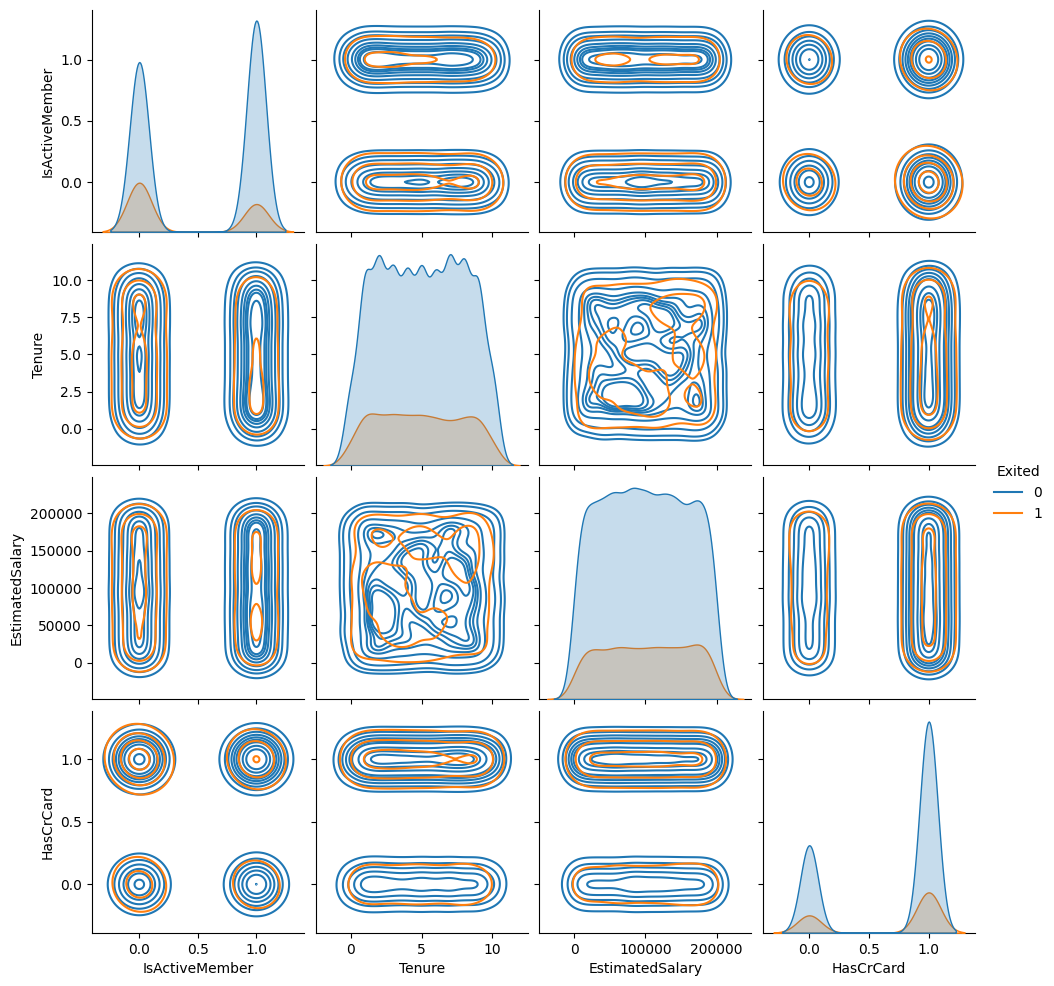

In [16]:
import matplotlib.pyplot as plt
import seaborn as sns
plt.figure(figsize=(12,6))
sns.pairplot(data=df, vars=['IsActiveMember','Tenure',
       'EstimatedSalary','HasCrCard'], hue='Exited',kind='kde')
plt.show()

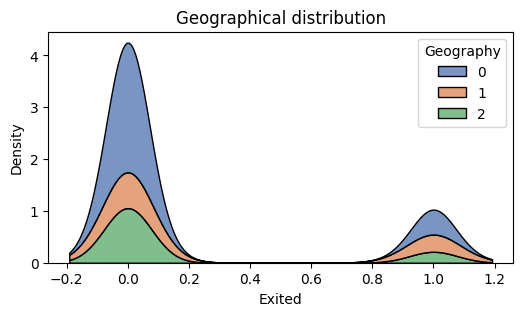

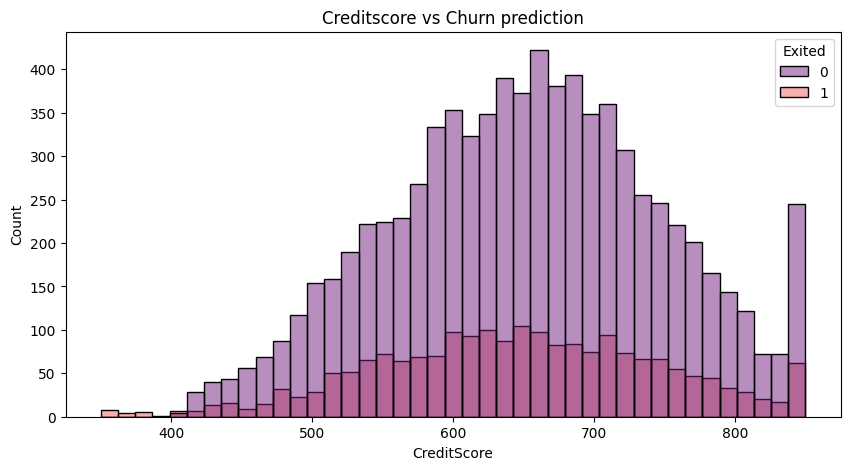

In [54]:
plt.figure(figsize=(6,3))
plt.title('Geographical distribution')
sns.kdeplot(data=df,x='Exited',hue='Geography',multiple='stack',palette='deep')
plt.show()
plt.figure(figsize=(10,5))
plt.title('Creditscore vs Churn prediction')
sns.histplot(data=df,x='CreditScore',hue='Exited',palette='magma',edgecolor='black')
plt.show()

<Figure size 1000x800 with 0 Axes>

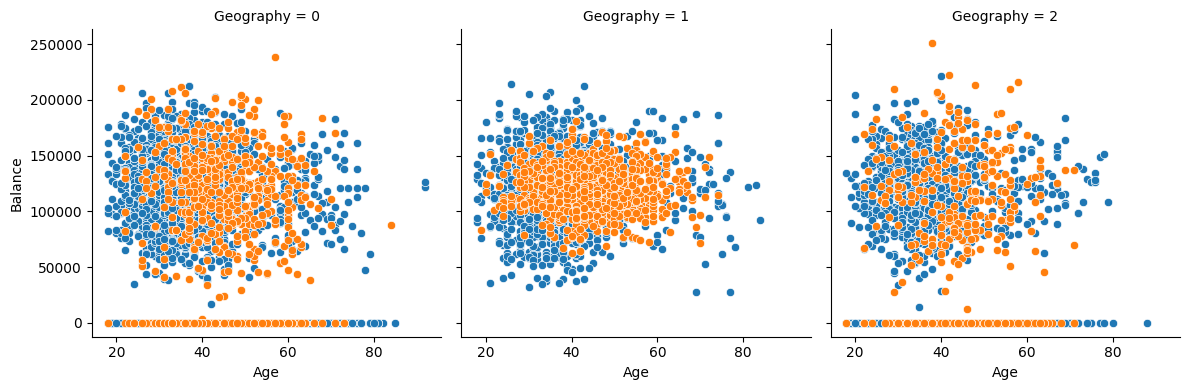

In [52]:
plt.figure(figsize=(10,8))
face_grid= sns.FacetGrid(df,col="Geography",hue="Exited",height=5)
face_grid.map(sns.scatterplot,"Age","Balance")
plt.show()

In [ ]:
!pip install cmasher
import cmasher as cmr

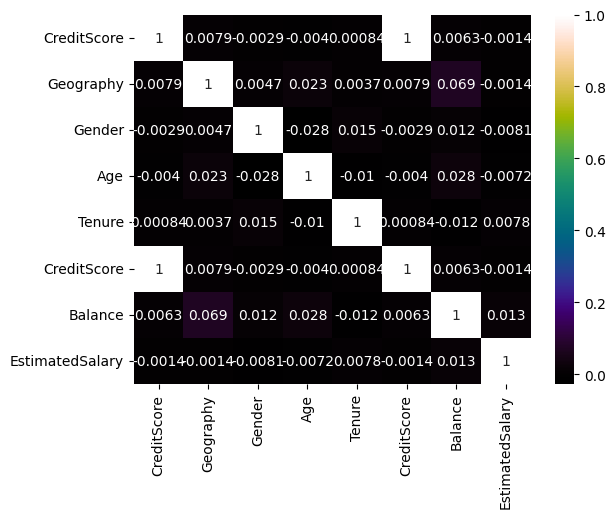

In [40]:
sns.heatmap(df[['CreditScore', 'Geography','Gender', 'Age',
       'Tenure','CreditScore','Balance',
       'EstimatedSalary']].corr(),annot=True,cmap=cmr.rainforest)
plt.show()

#**Step 4 :** **Data Preprocessing**

In [23]:
x=df.drop(['Exited'],axis=1)
y=df['Exited']



*   **Handeling imbalanced dataset**



In [41]:
!pip  install imblearn

In [25]:
from imblearn.over_sampling import SMOTE
x_sampled,y_sampled=SMOTE().fit_resample(x,y)



#    **Spliting the dataset into training and testing data**








In [26]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(x_sampled,y_sampled,test_size=0.9,random_state=70)

In [27]:
from sklearn.preprocessing import StandardScaler
scale=StandardScaler()
x_train=scale.fit_transform(x_train)
x_test=scale.transform(x_test)

In [ ]:
print(x_train)

In [ ]:
print(x_test)

In [39]:
df.isnull().sum()

CreditScore        0
Geography          0
Gender             0
Age                0
Tenure             0
Balance            0
NumOfProducts      0
HasCrCard          0
IsActiveMember     0
EstimatedSalary    0
Exited             0
dtype: int64

# **Step 5 : Model Building**

In [42]:
from sklearn.tree import DecisionTreeClassifier
dec=DecisionTreeClassifier()
dec.fit(x_train,y_train)
y_pred1=dec.predict(x_test)


In [43]:
from sklearn.metrics import accuracy_score,confusion_matrix,precision_score
print('ACCURACY SCORE OF DECISIONTREE CLASSIFER : ',accuracy_score(y_pred1,y_test))
print('PRECISION SCORE OF DECISIONTREE CLASSIFER : ',precision_score(y_pred1,y_test))
print('CONFUSION MATRIX OF DECISIONTREE CLASSIFER : ',confusion_matrix(y_pred1,y_test))

ACCURACY SCORE OF DECISIONTREE CLASSIFER :  0.7459187944746756
PRECISION SCORE OF DECISIONTREE CLASSIFER :  0.763478504411147
CONFUSION MATRIX OF DECISIONTREE CLASSIFER :  [[5240 1689]
 [1953 5452]]


In [44]:
log=LogisticRegression()
log.fit(x_train,y_train)
y_pred2=log.predict(x_test)
print('ACCURACY SCORE OF logistics regression : ',accuracy_score(y_pred2,y_test))
print('PRECISION SCORE OF logistics regression : ',precision_score(y_pred2,y_test))
print('CONFUSION MATRIX OF logistics regression : ',confusion_matrix(y_pred2,y_test))

ACCURACY SCORE OF logistics regression :  0.7671271103669597
PRECISION SCORE OF logistics regression :  0.8005881529197592
CONFUSION MATRIX OF logistics regression :  [[5279 1424]
 [1914 5717]]


In [45]:
ran=RandomForestClassifier()
ran.fit(x_train,y_train)
y_pred3=ran.predict(x_test)
print('ACCURACY SCORE OF RandomForestClassifier: ',accuracy_score(y_pred3,y_test))
print('PRECISION SCORE OF RandomForestClassifier : ',precision_score(y_pred3,y_test))
print('CONFUSION MATRIX OF RandomForestClassifier : ',confusion_matrix(y_pred3,y_test))

ACCURACY SCORE OF RandomForestClassifier:  0.8174968606111344
PRECISION SCORE OF RandomForestClassifier :  0.8218736871586613
CONFUSION MATRIX OF RandomForestClassifier :  [[5849 1272]
 [1344 5869]]


In [46]:
new_df=pd.DataFrame({
     'ACCURACY SCORE':[0.747035021626901,0.7692898004743965,0.822450118599135],
     'PRECISION SCORE':[0.7682397423330066,0.830275871726649,0.830275871726649]
})
new_df=new_df.round(2)
new_df.head()

,ACCURACY SCORE,PRECISION SCORE
0,0.75,0.77
1,0.77,0.83
2,0.82,0.83


In [47]:
new_df.insert(0,'MODEL NAME',['Logistic_regression','Decision_tree_classifer','Random_forest_classifer'])
new_df.head()

,MODEL NAME,ACCURACY SCORE,PRECISION SCORE
0,Logistic_regression,0.75,0.77
1,Decision_tree_classifer,0.77,0.83
2,Random_forest_classifer,0.82,0.83


In [48]:
new_df['MODEL NAME']=pd.Categorical(new_df['MODEL NAME'])
new_df['MODEL NAME']=new_df['MODEL NAME'].cat.codes
new_df.head()

,MODEL NAME,ACCURACY SCORE,PRECISION SCORE
0,1,0.75,0.77
1,0,0.77,0.83
2,2,0.82,0.83


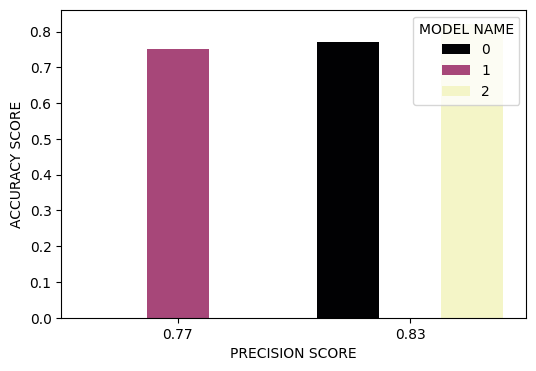

In [49]:
plt.figure(figsize=(6,4))
sns.barplot(data=new_df,x='PRECISION SCORE',y='ACCURACY SCORE',hue='MODEL NAME',palette='magma',orient="x",errorbar="sd")
plt.show()

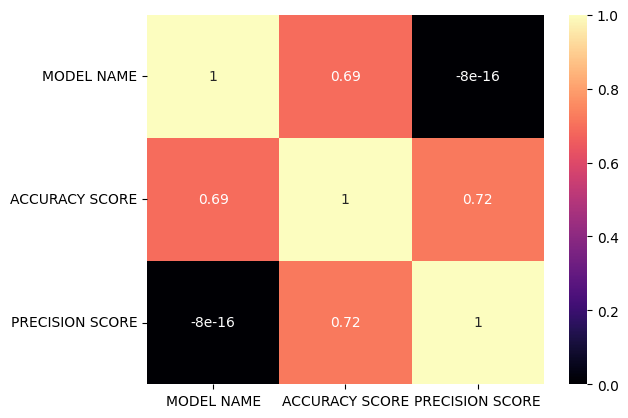

In [50]:
sns.heatmap(new_df.corr(),annot=True,cmap='magma')
plt.show()